In [1]:
# Install necessary libraries if not installed
!pip install shap scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset (Change file path if running locally)
file_path = "retail_India.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='rawdata')

# Select relevant features for the analysis
features = ["Product Type", "Discount offered", "Freight Expenses",
            "Order Priority", "Segment", "Unit Price", "Quantity ordered new", "Sales"]
target = "Profit"

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Fill missing values in features
df = df.fillna(df.median(numeric_only=True))

# Encode categorical variables
le = LabelEncoder()
for col in ["Product Type", "Order Priority", "Segment"]:
    df[col] = le.fit_transform(df[col].astype(str))

# Split dataset into training and testing
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP Analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualizing SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Analysis: Factors Influencing Profit")
plt.show()


 97%|=================== | 493/507 [00:21<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 123.554316, while the model output was 58.516930. If this difference is acceptable you can set check_additivity=False to disable this check.

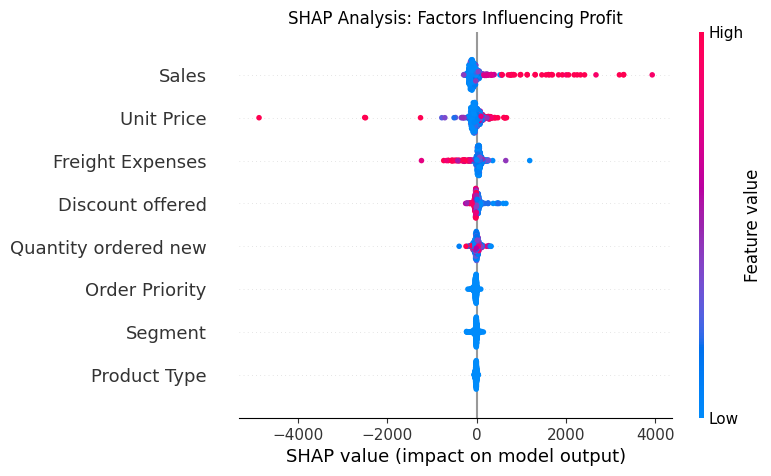

In [2]:
# Install necessary libraries if not installed
!pip install shap scikit-learn pandas matplotlib openpyxl

# Import libraries
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset (Update file path if running locally)
file_path = "retail_India.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='rawdata')

# Select relevant features
features = ["Product Type", "Discount offered", "Freight Expenses",
            "Order Priority", "Segment", "Unit Price", "Quantity ordered new", "Sales"]
target = "Profit"

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Fill missing numerical values with median
for col in ["Discount offered", "Freight Expenses", "Unit Price", "Quantity ordered new", "Sales"]:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
le_dict = {}
for col in ["Product Type", "Order Priority", "Segment"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  # Store label encoders for consistent encoding in test set

# Split dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure categorical encoding consistency in test set
for col in ["Product Type", "Order Priority", "Segment"]:
    X_test[col] = X_test[col].apply(lambda x: le_dict[col].transform([str(x)])[0] if str(x) in le_dict[col].classes_ else -1)

# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test, check_additivity=False)  # Fix additivity issue

# Visualizing SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Analysis: Factors Influencing Profit")
plt.show()


In [3]:
import numpy as np
import shap

# Extract mean absolute SHAP values for feature importance
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a dictionary of feature importance
feature_importance = dict(zip(X_test.columns, shap_importance))

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Interpretation
print("### SHAP Interpretation for Profit Prediction ###\n")

for feature, importance in sorted_features:
    avg_shap = shap_values[:, X_test.columns.get_loc(feature)].values.mean()
    direction = "increases" if avg_shap > 0 else "decreases"

    print(f"- {feature}: Has a significant impact on profit. Higher values of this feature generally {direction} profit.")


### SHAP Interpretation for Profit Prediction ###

- Sales: Has a significant impact on profit. Higher values of this feature generally increases profit.
- Unit Price: Has a significant impact on profit. Higher values of this feature generally decreases profit.
- Freight Expenses: Has a significant impact on profit. Higher values of this feature generally increases profit.
- Discount offered: Has a significant impact on profit. Higher values of this feature generally increases profit.
- Quantity ordered new: Has a significant impact on profit. Higher values of this feature generally decreases profit.
- Order Priority: Has a significant impact on profit. Higher values of this feature generally decreases profit.
- Segment: Has a significant impact on profit. Higher values of this feature generally decreases profit.
- Product Type: Has a significant impact on profit. Higher values of this feature generally decreases profit.
